In [55]:
#importing data and necessary packages
import pandas as pd
import numpy as np

data = pd.read_csv("/content/titanic.csv")

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
#Pre-Processing data
#Summary of data
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


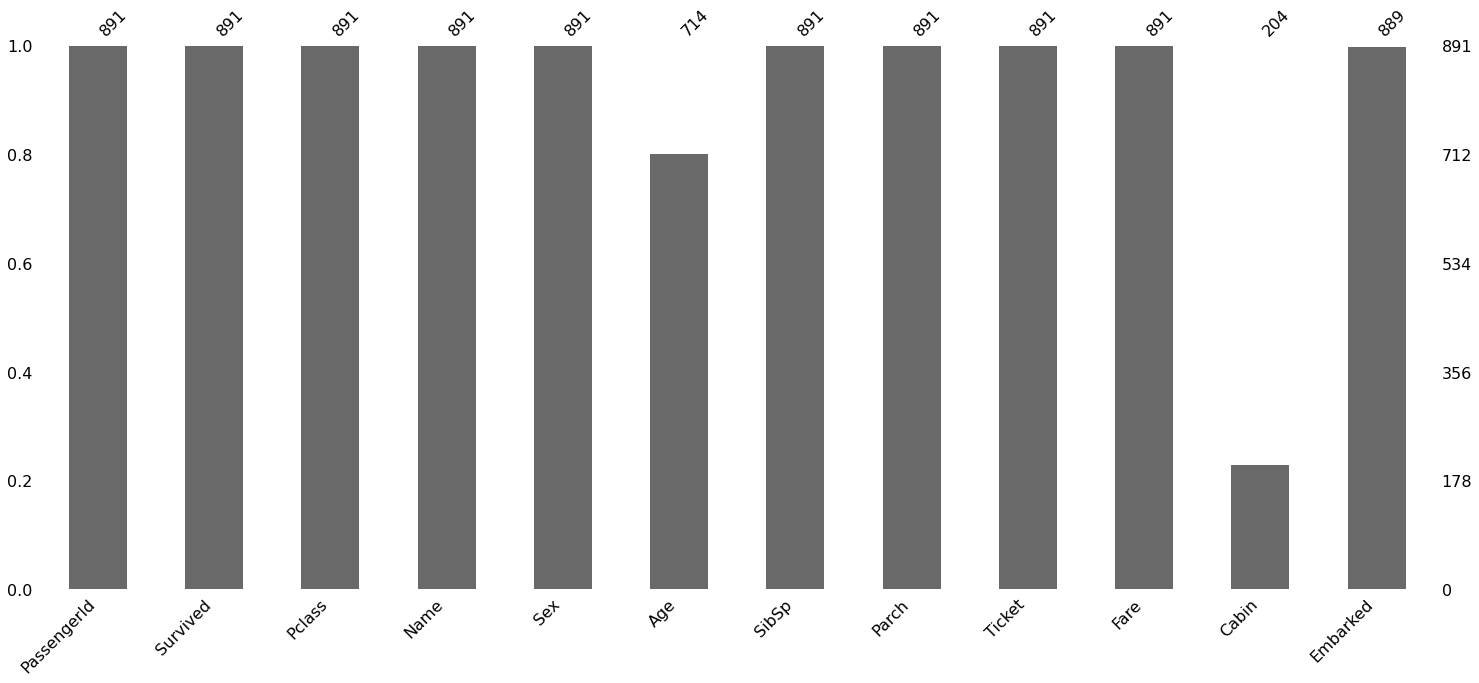

In [57]:
#visualizing data in bar chart format to se null attributes
import missingno as msno
msno.bar(data)

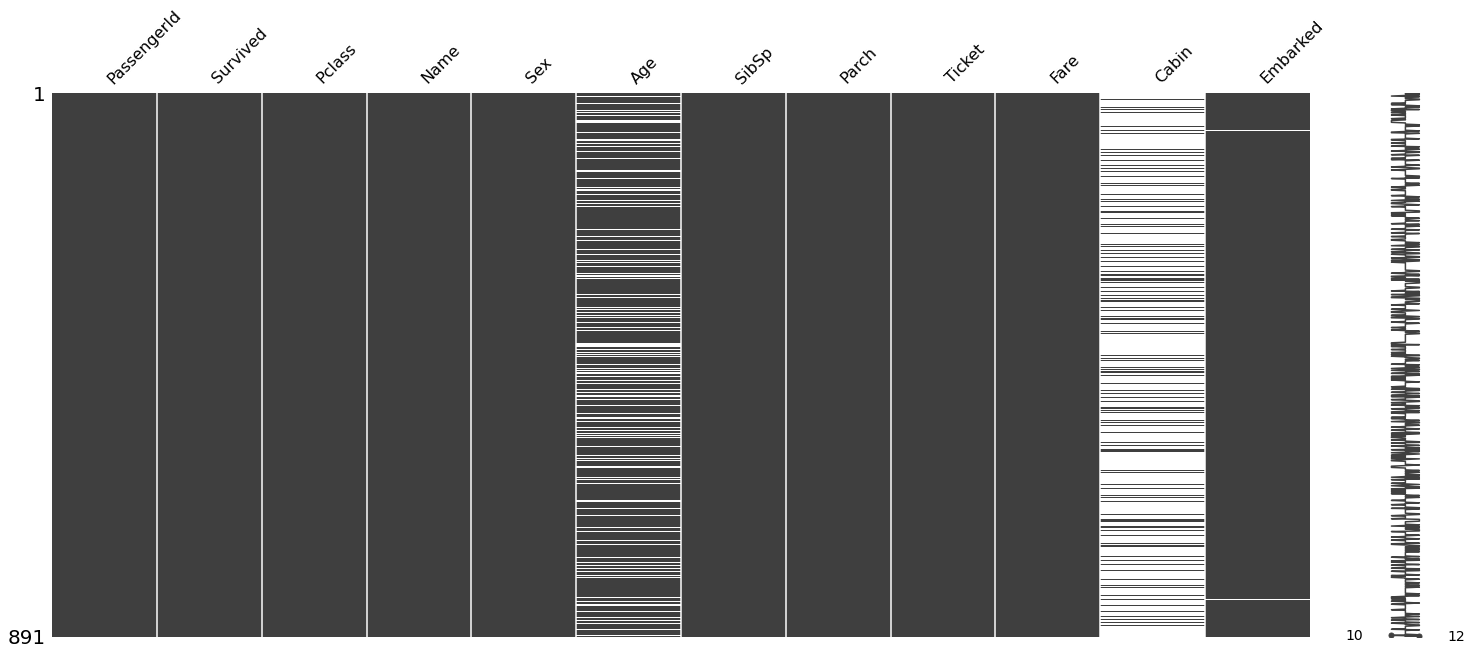

In [58]:
#visulaizing data in matrix form
msno.matrix(data)

In [59]:
#preprocesing by dropping unwanted columns
df = data.drop(['PassengerId', 'Name', 'Survived'], axis=1)

df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,female,19.0,0,0,112053,30.0000,B42,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,26.0,0,0,111369,30.0000,C148,C


In [60]:
#encoding columns
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,523,7.2500,147,2
1,1,0,38.0,1,0,596,71.2833,81,0
2,3,0,26.0,0,0,669,7.9250,147,2
3,1,0,35.0,1,0,49,53.1000,55,2
4,3,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,147,2
887,1,0,19.0,0,0,14,30.0000,30,2
888,3,0,NaN,1,2,675,23.4500,147,2
889,1,1,26.0,0,0,8,30.0000,60,0


In [61]:
#checking if any column has null values
df.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin       False
Embarked    False
dtype: bool

In [62]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [63]:
#omitting all null values from the dataset by applying mean/median of the values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))

df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,523,7.2500,147,2
1,1,0,38.0,1,0,596,71.2833,81,0
2,3,0,26.0,0,0,669,7.9250,147,2
3,1,0,35.0,1,0,49,53.1000,55,2
4,3,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,147,2
887,1,0,19.0,0,0,14,30.0000,30,2
888,3,0,28.0,1,2,675,23.4500,147,2
889,1,1,26.0,0,0,8,30.0000,60,0


In [64]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8137e2f250>,
      dtype=object)

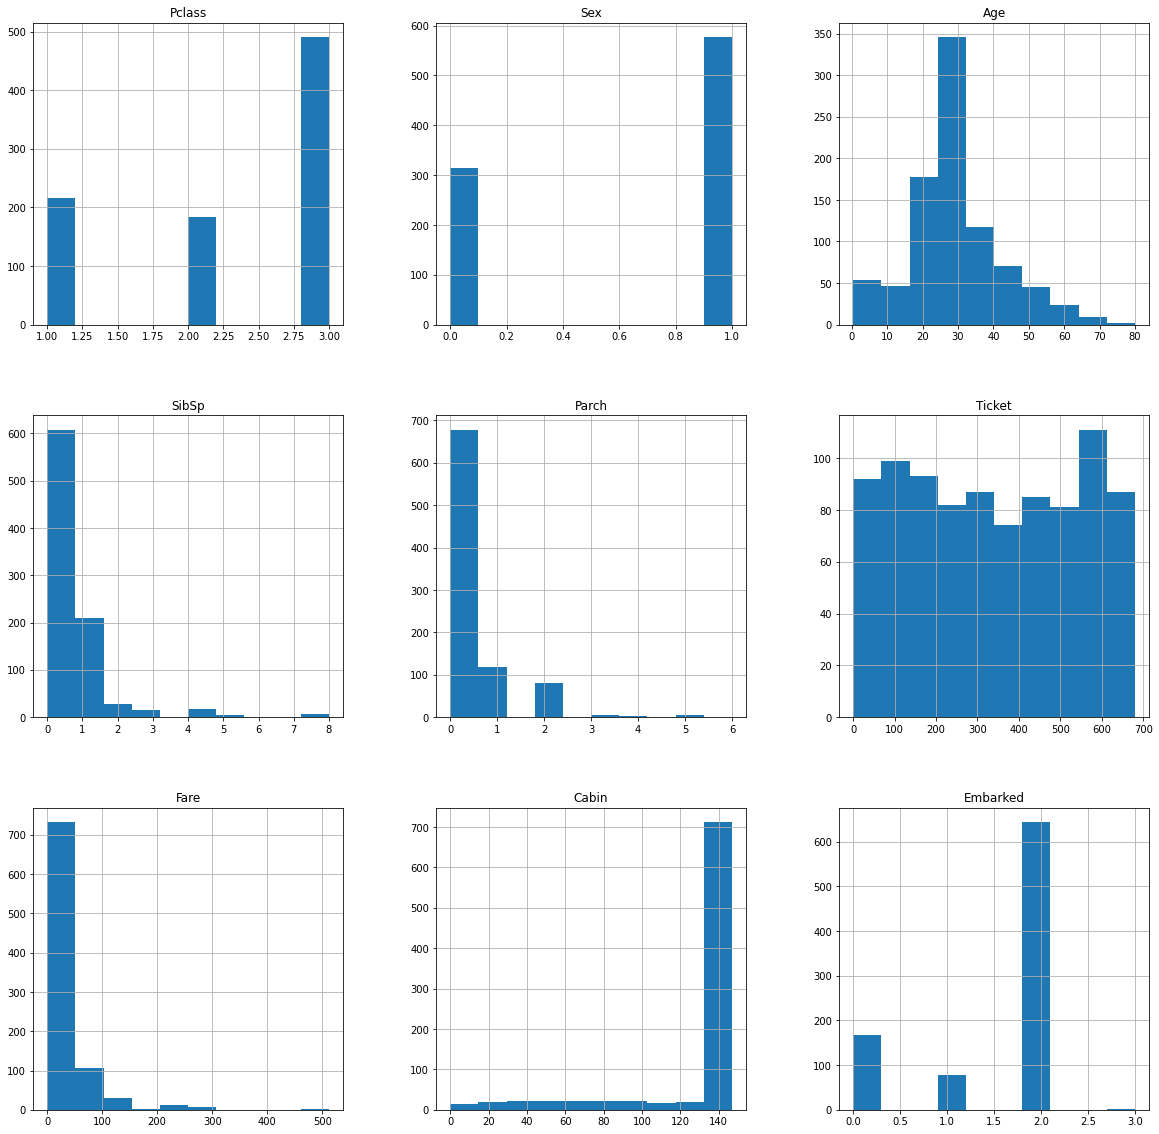

In [65]:
#Plotting bar plots to check the uniformity or distribution of the values in each feature/attribute
df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].hist(figsize=(20,20))

In [66]:
# Assigning features and targets

x = df
y = data['Survived']

In [67]:
# Splitting the given dataset into a train and test with ratio of 80:20 of train:test respectively
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [68]:
#import KNN Classifier from sklearn
#training and fitting the model 
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
#predicting the model
pred = model.predict(x_test)

In [70]:
#importing accuracy measures for evaluating the model
from sklearn import metrics

metrics.confusion_matrix(y_test,pred)

array([[86, 19],
       [34, 40]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


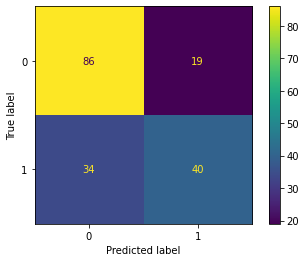

In [71]:
#visualize the confusion matrix for the model
metrics.plot_confusion_matrix(model,x_test,y_test)

In [72]:
#The fitting and predicting the model

models=[]
accuracy=[]
# Making the models for each different k-value in a loop and storing the object and accuracy
for i in range(1,20):
    # the i is the k-value 
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    
    #Storing the model object for later use
    models.append(model)
    
    #Printing the accuracy and storing them to plot later
    print(f"Accuracy of {i} th neighbour : ",metrics.accuracy_score(y_test, preds))
    accuracy.append(metrics.accuracy_score(y_test, preds))

Accuracy of 1 th neighbour :  0.6703910614525139
Accuracy of 2 th neighbour :  0.6703910614525139
Accuracy of 3 th neighbour :  0.6815642458100558
Accuracy of 4 th neighbour :  0.6871508379888268
Accuracy of 5 th neighbour :  0.7039106145251397
Accuracy of 6 th neighbour :  0.7094972067039106
Accuracy of 7 th neighbour :  0.6983240223463687
Accuracy of 8 th neighbour :  0.7430167597765364
Accuracy of 9 th neighbour :  0.7206703910614525
Accuracy of 10 th neighbour :  0.7318435754189944
Accuracy of 11 th neighbour :  0.7653631284916201
Accuracy of 12 th neighbour :  0.7318435754189944
Accuracy of 13 th neighbour :  0.6983240223463687
Accuracy of 14 th neighbour :  0.7094972067039106
Accuracy of 15 th neighbour :  0.7150837988826816
Accuracy of 16 th neighbour :  0.7206703910614525
Accuracy of 17 th neighbour :  0.7206703910614525
Accuracy of 18 th neighbour :  0.7150837988826816
Accuracy of 19 th neighbour :  0.7039106145251397


<function matplotlib.pyplot.show>

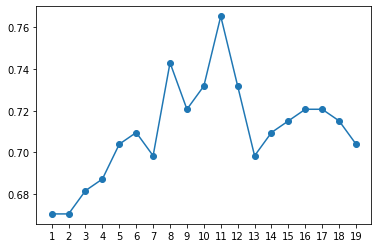

In [73]:
# We can see here that k=11 gives the best accuracy

#Plotting the accuracies with respect to the k-value
import matplotlib.pyplot as plt

plt.scatter(range(1,20),accuracy)
plt.plot(range(1,20), accuracy)
plt.xticks(np.arange(1, 20, step=1)) 
plt.show

In [74]:
## Predicting for a new data point of values (3,1,35.0,0,0,472,8.0500,147,2)

print("Predicting for a new value (1,0,35.0,1,0,49,53.1000,55,2): ",models[10].predict([[1,0,35.0,1,0,49,53.1000,55,2]])[0])

Predicting for a new value (1,0,35.0,1,0,49,53.1000,55,2):  1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Inference**



*   As the dataset used here is equally distributed among the categorical values,there is no need for scaling the dataset.
*   Label Encoding as a preprocessing step is required for some columns that were initially not in numerical format.

